<Axes: xlabel='DATE'>

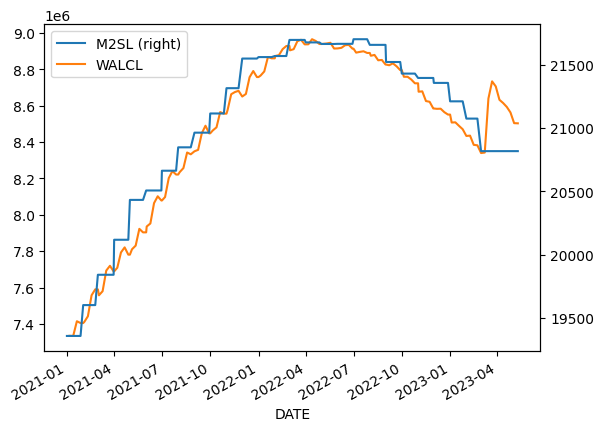

In [3]:
#유동성지표
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

data=fdr.DataReader('FRED:WALCL,M2SL',start='2021-01-01')
data.plot(secondary_y='M2SL')

In [2]:
data

,M2SL,WALCL
DATE,,
2021-01-01,19356.4,NaN
2021-01-06,19356.4,7334809.0
2021-01-13,19356.4,7333968.0
2021-01-20,19356.4,7414942.0
2021-01-27,19356.4,7404926.0
...,...,...
2023-04-05,20818.1,8632384.0
2023-04-12,20818.1,8614797.0
2023-04-19,20818.1,8593263.0


WALCL :연준이 은행에 푼 유동성
, M2SL :시중에 풀려있는돈 이라고 생각하시면 됩니다. 

SVB 파산 이후 유동성을 쫙 풀었다가 다시 23년 1월 수준으로 복귀했습니다. 연준은 아직 긴축하고 있습니다.

<Axes: xlabel='DATE'>

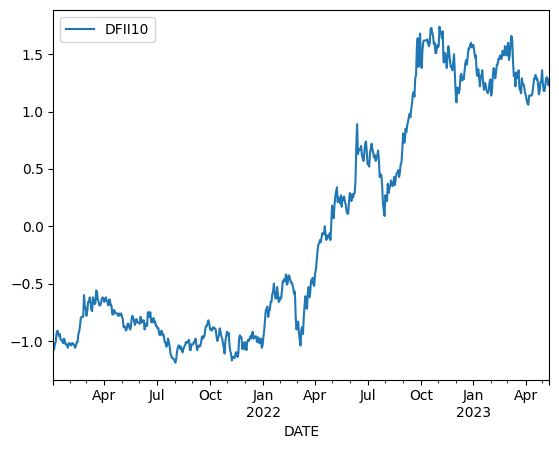

In [6]:
data=fdr.DataReader('FRED:DFII10', start='2021-01-01')
data.plot()

10년물 국채와 10년 TIPS(물가연동국채) 수익률 스프레드입니다. 인플레이션이 상승할 것이라고 생각하는 경우 스프레드가 증가합니다.

<Axes: xlabel='DATE'>

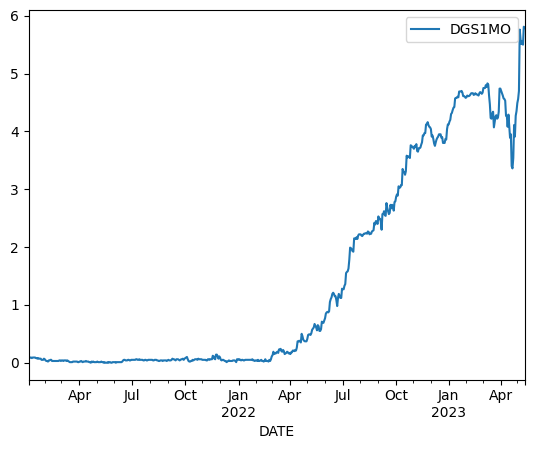

In [7]:
data=fdr.DataReader('FRED:DGS1MO',start='2021-01-01')
data.plot()

이건 원래 보던 지표는 아닌데 최근 미국 부채한도 논의에 따른 디폴트 우려로 참고용으로 보고있습니다.